<a href="https://colab.research.google.com/github/fernanda0402/Big-Data-Astro/blob/main/Projeto_Iminuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Trabalho final da disciplina de Big Data e Astroinformática**

Nome: Fernanda Araujo de Oliveira

Professor: Clécio deBom

*Análise Bayesiana da expressão da dispersão de velocidades com termos de gravidade modificada utilizando o Iminuit.*

Primeiramente, vamos refazer os exemplos dados em https://indico.cern.ch/event/833895/contributions/3577808/attachments/1927550/3191336/iminuit_intro.html a fim de entender melhor o programa.

In [ ]:
# !pip install iminuit matplotlib numpy
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["font.size"] = 20
import numpy as np
!pip3 install iminuit

Exemplo 1: Vamos usar um modelo de função linear.

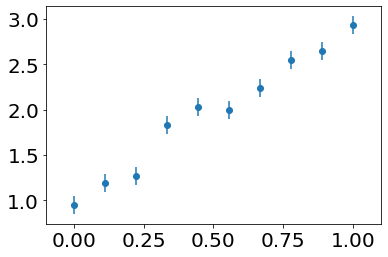

In [ ]:
# let's make a line model
def line(x, a, b):
    return a + (x * b)

a_true = 1.0
b_true = 2.0

# let's make some data
x = np.linspace(0, 1, 10)

# precomputed random numbers from standard normal distribution
z = np.array([-0.49783783, -0.33041722, -1.71800806,  1.60229399,
                 1.36682387, -1.15424221, -0.91425267, -0.03395604,
                 -1.27611719, -0.7004073 ])

sigma_y = 0.1 * np.ones_like(x)
y = line(x, a_true, b_true) + sigma_y * z

plt.errorbar(x, y, sigma_y, fmt="o")
plt.xlim(-0.1, 1.1);

*   Estimar os valores dos parâmetros (a,b) a partir dos dados;
*   Precisamos de um valor mínimo para o qual o modelo melhor concorda com os dados: método dos mínimos quadrados ou método da máxima likelihood;
*   O MINUIT sempre minimiza;
*   Usar o IMINUIT para minimizar numericamente como função dos parâmetros do modelo.





In [ ]:
# least-squares score function = sum of data residuals squared
def LSQ(a, b):
    return np.sum((y - line(x, a, b)) ** 2 / sigma_y ** 2)

In [ ]:
# everything in iminuit is done through the Minuit object, so we import it
from iminuit import Minuit



*   MINUIT busca por mínimos locais usando o método "gradiente-descendente" a partir do ponto de partida;
*   Se a função possui muitos mínimos, o mínimo encontrado vai depender do ponto de partida;
*   Se a função possui só um mínimo, o IMINUIT vai convergir mais rapidamente se começar mais próximo desse;
*   Se não for fornecido um ponto de partida, o IMINUIT começará do zero (o que pode ser ruim).

In [ ]:
# set start values via keywords for a and b
m = Minuit(LSQ, a=5, b=5)

In [ ]:
# set step size with error_<name>=... keyword
m = Minuit(LSQ, a=5, b=5)

m.limits['a'] = (0,10)
m.limits['b'] = (0,10)

In [ ]:
m.migrad()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  """Entry point for launching an IPython kernel.


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 10.39                      │              Nfcn = 75               │
│ EDM = 9.63e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.99    │   0.06    │            │            │    0    │   10    │       │
│ 1 │ b    │   1.94    │   0.10    │            │            │    0    │   10    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │  0.00345 -0.00491 │
│ b │ -0.00491  0.00982 │
└───┴───────────────────┘

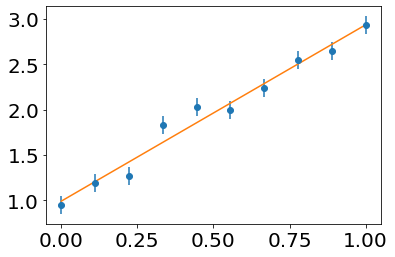

In [ ]:
# get parameter values
a_fit = m.values["a"]  # m.values[0] also works
b_fit = m.values["b"]  # m.values[1] also works

plt.errorbar(x, y, sigma_y, fmt="o")
plt.plot(x, line(x, a_fit, b_fit));

In [ ]:
# release fix on "a" and minimize again
m.fixed["a"] = False  # m.fixed[0] = False also works
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 10.39                      │              Nfcn = 89               │
│ EDM = 7.94e-16 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.99    │   0.06    │            │            │    0    │   10    │       │
│ 1 │ b    │   1.94    │   0.10    │            │            │    0    │   10    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │  0.00345 -0.00491 │
│ b │ -0.00491  0.00982 │
└───┴───────────────────┘

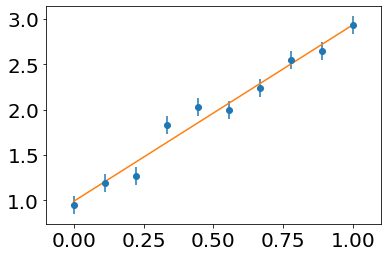

In [ ]:
# get better parameter values
a_fit = m.values["a"]
b_fit = m.values["b"]

plt.errorbar(x, y, sigma_y, fmt="o")
plt.plot(x, line(x, a_fit, b_fit))
plt.xlim(-0.1, 1.1);

Exemplo 2: Ajuste de modelo com número flexível de parâmetros:



*   Modelo com número maior ou variável de parâmetros.


In [ ]:
def LSQ_numpy(a, b, c, d):  # par is numpy array here  
    par = [a, b, c, d] 
    ym = np.polyval(par, x)  # for len(par) == 2 this is a line 
    return np.sum((y - ym) ** 2 / sigma_y ** 2) #y é o que vem dos dados e ym o que vem da teoria

In [ ]:
m = Minuit(LSQ_numpy, a = 1., b = 1., c = 1., d = 1.)

In [ ]:
m.migrad()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  """Entry point for launching an IPython kernel.


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 9.033                      │              Nfcn = 96               │
│ EDM = 8.56e-20 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    0.8    │    1.3    │            │            │         │         │       │
│ 1 │ b    │   -1.5    │    2.0    │            │            │         │         │       │
│ 2 │ c    │    2.7    │    0.8    │            │            │         │         │       │
│ 3 │ d    │   0.91    │   0.09    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────┐
│   │       a       b       c       d │
├───┼─────────────────────────────────┤
│ a │    1.72   -2.58   0.979 -0.0595 │
│ b │   -2.58       4   -1.59   0.108 │
│ c │   0.979   -1.59   0.691 -0.0572 │
│ d │ -0.0595   0.108 -0.0572 0.00824 │
└───┴─────────────────────────────────┘

In [ ]:
m.values

<ValueView a=0.7654754973599222 b=-1.5030492741091694 c=2.735440243275514 d=0.911937259682182>

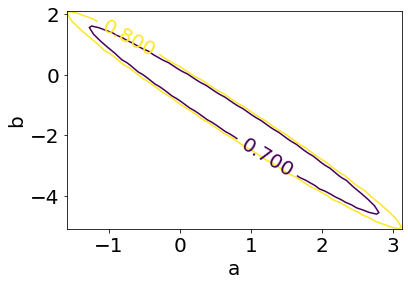

In [ ]:
m.draw_mncontour('a','b', cl=[0.7, 0.8]);

In [ ]:
# check reduced chi2, goodness-of-fit estimate, should be around 1
m.fval / (len(y) - len(m.values))

1.5055320143296285

Tendo finalizado os exemplos, vamos para a função que queremos minimizar.

A função a ser minimizada é a dispersão de velocidades, já com a inserção dos termos oriundos da gravidade modificada.

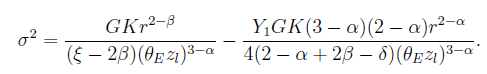

em que:

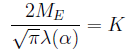

$M_E$ é a massa de um cilindro com raio igual ao raio de Einstein $\theta_E$ e $R_E = D_l \theta_E$,

$\lambda(x) = \Gamma(\frac{x-1}{2})/ \Gamma(\frac{x}{2})$,

$\xi = \delta + \alpha - 2$.

Os parâmetros $\alpha$ e $\delta$ são as potências das expressões de densidade de massa e densidade de luminosidade, respectivamente.
Já $\beta$ é definido da seguinte forma:
$\beta(r) = 1 - \frac{\sigma_t ^2}{\sigma_r ^2}$.

Porém, consideraremos que $\beta$ é constante.

Logo, os parâmetros presentes na função que queremos minimizar são: $\alpha$, $\delta$, $\beta$ e $\theta_E$.

Abrindo os dados enviados pelo professor:

In [ ]:
import pandas as pd
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
lenses_DESc = pd.read_csv("/content/drive/MyDrive/lenses_DESc.txt",
                          sep=' ',
                          comment='#',
                          names=['id', 'zl', 'zs', 'b', 'sig_v', 'ql', 'rl', 'lens_g', 'lens_r', 'lens_i', 'xs', 'ys', 'qs', 'ps', 'rs', 'source_g', 'source_r', 'source_i', 'mu_s', 'g_band_coadd_seeing', 'g_band_coadd_signal_to_noise', 'r_band_coadd_seeing', 'r_band_coadd_signal_to_noise', 'i_band_coadd_seeing'])

In [ ]:
#Testando operações com os dados
lenses_DESc["zs"]-lenses_DESc["zl"]

0        1.464
1        1.388
2        0.716
3        3.196
4        0.489
         ...  
18593    0.908
18594    0.743
18595    0.219
18596    0.764
18597    2.467
Length: 18598, dtype: float64

In [ ]:
d_ls = cosmo.angular_diameter_distance_z1z2(lenses_DESc["zl"], lenses_DESc["zs"]).value

In [ ]:
d_l = cosmo.angular_diameter_distance(lenses_DESc["zl"]).value

O que é fornecido são os dados de $\sigma_v$, porém a expressão que queremos minimizar é a de $\sigma_v ^2$. 

In [ ]:
(lenses_DESc["sig_v"])**2

0         70284.372544
1         70047.562225
2        101491.942084
3         66091.154724
4         58884.360921
             ...      
18593     57210.420969
18594    105483.347524
18595     80496.470961
18596     57259.704100
18597     62282.689225
Name: sig_v, Length: 18598, dtype: float64

Vamos criar uma lista com estes novos dados:

In [ ]:
lista1 = (lenses_DESc["sig_v"])**2

Criando uma nova coluna na nossa tabela de dados:

In [ ]:
lenses_DESc["sig2"] = lista1

Definindo a função que queremos minimizar:

In [ ]:
#alpha é a
#Raio de Einstein é b (definido assim pra ficar em acordo com a forma que é chamado nos dados)
#delta é c
#beta é d
#xi é e

#Definindo as constantes:
g = 6.67430*((10)**(-11))
k = 1

def LSQ_numpy(a, d, e, y1):  # par is numpy array here  
    #par = [a, b, c, d, e] 
    ym = ((g*k*d_l**(2-d))/((e-2*d)*(((lenses_DESc["b"])*(lenses_DESc["zl"]))**(3-a))) - (g*y1*k*(3-a)*(2-a)*d_l**(2-a))/(4*(((lenses_DESc["b"])*(lenses_DESc["zl"]))**(3-a))*(2*d - e)))
    y = lenses_DESc["sig2"]
    return np.sum((y - ym) ** 2 / lenses_DESc["sig2"] ** 2)

Vamos determinar nossos chutes iniciais a partir de Cao et al (doi:10.3847/1538-4357/835/1/92):

In [ ]:
m1 = Minuit(LSQ_numpy, a = 2., d = 0.25, e = 2.4, y1 = 1.)

In [ ]:
m1.migrad()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  """Entry point for launching an IPython kernel.


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.644e+04                  │              Nfcn = 805              │
│ EDM = 97.4 (Goal: 0.0002)        │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  0.0777   │  0.0024   │            │            │         │         │       │
│ 1 │ d    │1.01685444 │0.00000006 │            │            │         │         │       │
│ 2 │ e    │2.03371164 │0.00000005 │            │            │         │         │       │
│ 3 │ y1   │   19.3    │    0.6    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────┐
│    │         a         d         e        y1 │
├────┼─────────────────────────────────────────┤
│  a │  5.58e-06  9.41e-11  3.32e-11 -0.000496 │
│  d │  9.41e-11   3.1e-15  1.23e-15  -2.6e-08 │
│  e │  3.32e-11  1.23e-15  2.03e-15 -7.79e-09 │
│ y1 │ -0.000496  -2.6e-08 -7.79e-09     0.331 │
└────┴─────────────────────────────────────────┘

In [ ]:
m1.values

<ValueView a=0.07769059058126493 d=1.0168544400405446 e=2.033711639600294 y1=19.34641025845097>

In [ ]:
# check reduced chi2, goodness-of-fit estimate, should be around 1
m1.fval / (len(y) - len(m1.values))

2739.2564715400626

Temos um valor muito grande para $\chi^2$, o que nos mostra que nossa minimização não está boa. Uma forma de buscar melhorá-la é utilizar a incerteza de $\sigma_v ^2$ no denominador. Esta incerteza pode ser estimada dos dados da tabela:

In [ ]:
lenses_DESc.describe()

,id,zl,zs,b,sig_v,ql,rl,lens_g,lens_r,lens_i,xs,ys,qs,ps,rs,source_g,source_r,source_i,mu_s,g_band_coadd_seeing,g_band_coadd_signal_to_noise,r_band_coadd_seeing,r_band_coadd_signal_to_noise,i_band_coadd_seeing,sig2
count,18598.000000,18598.000000,18598.000000,18598.000000,18598.000000,18598.000000,18598.000000,18598.000000,18598.000000,18598.000000,18598.000000,18598.000000,18598.000000,18598.000000,18598.000000,18598.000000,18598.000000,18598.000000,18598.000000,18598.000000,18598.000000,18598.000000,18598.000000,18598.000000,18598.000000
mean,11046.946069,0.468950,1.856381,1.353211,271.533027,0.731085,0.949126,21.034164,19.158004,18.232113,0.949126,-0.004766,0.001532,0.642598,90.530247,0.301735,17.068227,1.371592,35.162853,1.372250,28.086519,1.374224,22.482294,24.068799,75297.051984
std,6481.693422,0.248618,0.757200,0.427020,39.584740,0.142077,0.526452,2.457607,2.171906,1.849838,0.526452,0.364590,0.457729,0.175358,51.621632,0.219839,38.906125,0.221616,34.788853,0.221999,29.114978,0.223380,30.676607,23.033092,21967.707664
min,0.000000,0.027000,0.150000,0.532000,156.393000,0.203000,0.196000,12.221000,11.258000,10.907000,0.196000,-2.023000,-2.022000,0.200000,0.008000,0.001000,3.000000,0.964000,0.000000,0.964000,0.001000,0.964000,0.001000,0.000000,24458.770449
25%,5300.250000,0.287000,1.334000,1.041000,243.312250,0.641000,0.632000,19.418000,17.656000,17.023000,0.632000,-0.180000,-0.221000,0.520000,46.080250,0.147000,4.852000,1.215000,21.150000,1.215000,15.694250,1.215000,10.701000,12.122500,59200.851005
50%,11463.500000,0.424000,1.832000,1.292000,269.813000,0.750000,0.823000,20.926000,19.019000,18.164500,0.823000,-0.005000,0.002000,0.658000,90.584500,0.261000,7.415000,1.391000,26.807000,1.391000,21.170500,1.391000,16.014000,20.989000,72799.054973
75%,16737.750000,0.603000,2.297000,1.593000,297.752750,0.837000,1.103000,22.525000,20.608750,19.352750,1.103000,0.168000,0.223000,0.778000,134.445500,0.406000,12.553500,1.567000,39.391500,1.567000,30.664750,1.567000,25.406750,29.866250,88656.700164
max,21998.000000,1.983000,5.576000,3.929000,399.836000,0.998000,9.720000,28.513000,28.047000,26.869000,9.720000,1.806000,2.011000,0.996000,179.999000,1.759000,1797.490000,1.659000,1089.091000,1.659000,1175.916000,1.659000,1694.654000,408.433000,159868.826896


In [ ]:
lenses_DESc["sig2"].describe(include = 'all')

count     18598.000000
mean      75297.051984
std       21967.707664
min       24458.770449
25%       59200.851005
50%       72799.054973
75%       88656.700164
max      159868.826896
Name: sig2, dtype: float64

Então, podemos encontrar um novo valor para $\chi^2$ :

In [ ]:
# check reduced chi2, goodness-of-fit estimate, should be around 1
m1.fval / (21967.707664)**2

3.405763334264361e-05